In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mode, mean
import copy

In [2]:
data = pd.read_csv("/content/Price of Tomato Karnataka(2016-2018).csv")

In [14]:
data.dropna(subset=['Variety'], inplace=True)
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

Market                        0
Arrival Date                  0
Arrivals (Tonnes)             0
Variety                       0
Minimum Price(Rs./Quintal)    0
Maximum Price(Rs./Quintal)    0
Modal Price(Rs./Quintal)      0
dtype: int64

In [15]:
data['Arrival Date'] = pd.to_datetime(data['Arrival Date'])
df_gb = data.groupby(['Arrival Date']).sum()
df_gb['periods']=df_gb.index.to_period("M")
df_p = df_gb.groupby(['periods']).sum()
print(df_p.head(5))

         Arrivals (Tonnes)
periods                   
2016-01            23240.0
2016-02            26139.0
2016-03            26181.0
2016-04            25423.0
2016-05            26429.0


In [17]:
data['Modal Price(Rs./Quintal)'] = data['Modal Price(Rs./Quintal)'].astype('int')

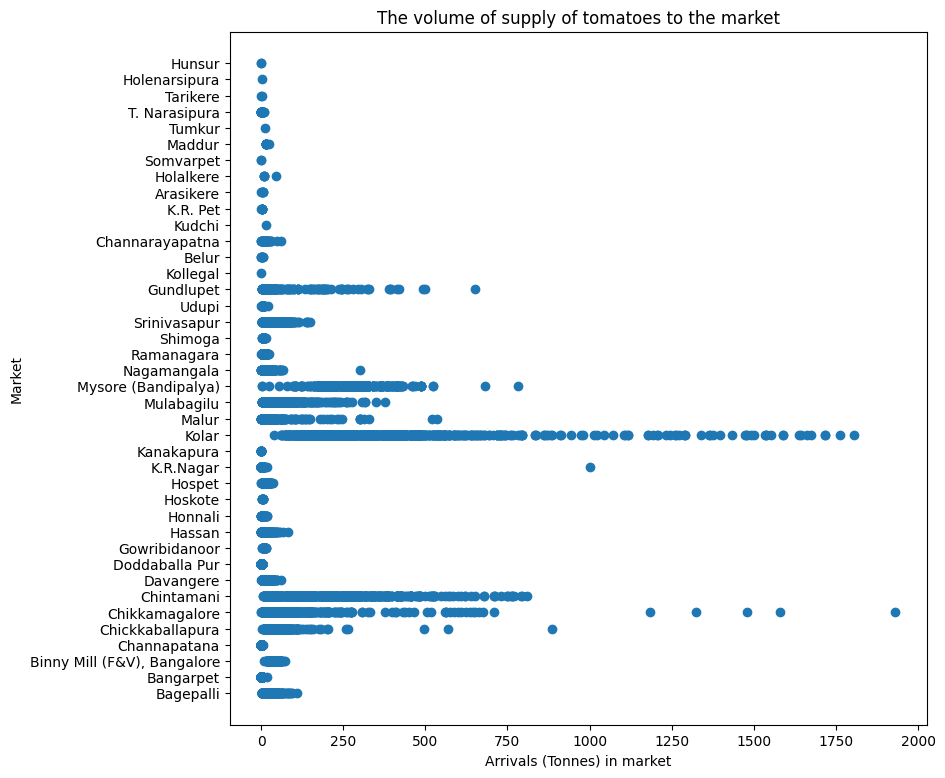

In [20]:
fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(data['Arrivals (Tonnes)'], data['Market'], marker='o');
ax.set(xlabel='Arrivals (Tonnes) in market', ylabel='Market', title='The volume of supply of tomatoes to the market');

In [21]:
data['revenue'] = data['Arrivals (Tonnes)']*data['Modal Price(Rs./Quintal)']*10

In [22]:
dt = pd.pivot_table(data, values='revenue', index=['Market'], aggfunc=np.sum)

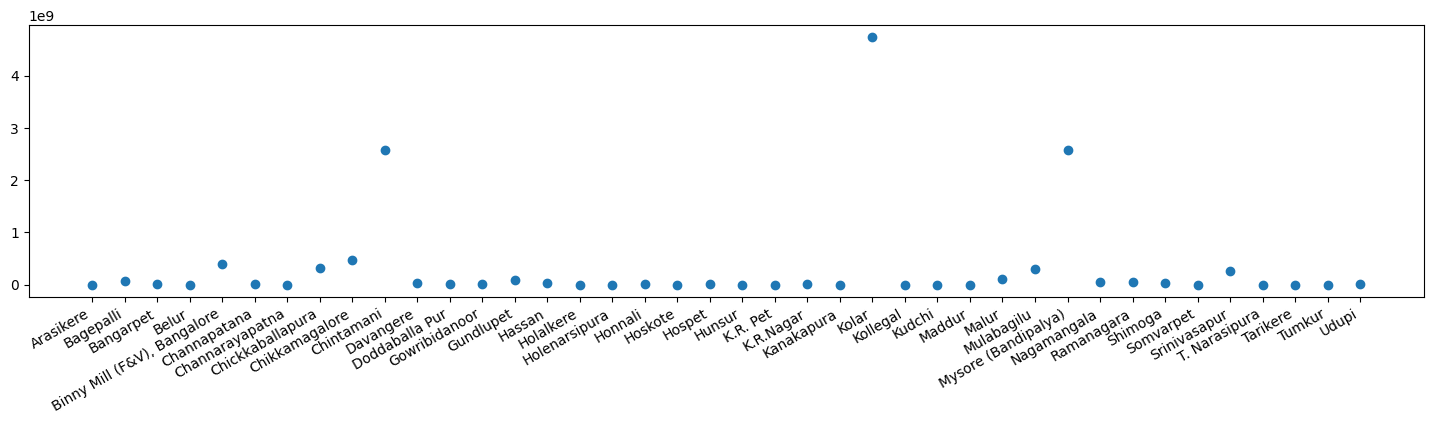

In [23]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.scatter(dt.index, dt);
plt.gcf().autofmt_xdate()